In [1]:
import math
import operator 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 

In [2]:
'''
Finds euclidiean distance b/w 2 point
sqrt((x1-x2)^2+(y1-y2)^2)
'''
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += pow((data1[x] - data2[x]), 2)
    return math.sqrt(distance)

In [3]:
'''Finds k-nearest neighbour to the given data point'''
def getKNeighbours(trainingSet, testData, k):
    distances = []
    for x in range(len(trainingSet)):  # Calcualtes distance of point of training set from the test data point
        dist = euclideanDistance(testData, trainingSet[x], len(testData)) 
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbours = []
    for x in range(k): # K-nearest neighours
        neighbours.append(distances[x][0])
    return neighbours

In [4]:
# Train and test datasets
trainSet = [[4, 4,'blue'], [6, 2,'blue'],[2,4,'orange'],[6,4,'orange'],[4,6,'orange'],[4,2,'orange']]
testSet = [6, 6 ]
k = 3
neighbours = getKNeighbours(trainSet, testSet, k)
print('Neighbours :',neighbours)

Neighbours : [[6, 4, 'orange'], [4, 6, 'orange'], [4, 4, 'blue']]


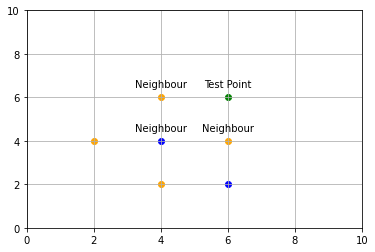

In [5]:
#plotting the datapoints and neightbours
plt.plot()
for item in trainSet:
    plt.scatter(item[0],item[1],c=item[2])
label = 'Neighbour'
for item in neighbours:
    plt.annotate(label,(item[0],item[1]),textcoords="offset points",xytext=(0,10),ha='center') 

plt.scatter(testSet[0],testSet[1],c='green',label='test')
label = 'Test Point'
plt.annotate(label,(testSet[0],testSet[1]),textcoords="offset points",xytext=(0,10),ha='center') 
plt.grid()
plt.axis([0, 10, 0 , 10])
plt.show()

In [6]:
#predicts the class of test data based on the k-nearest neighbours
def predict(neighbours):
    classVotes = {} # dictionary with labels and their counters
    for x in range(len(neighbours)):
        response = neighbours[x][-1]   # gets label 
        if response in classVotes:
            classVotes[response] += 1  # increase vote counter of label
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [7]:
print('Prediction for test data points :',predict(neighbours))

Prediction for test data points : orange


In [8]:
# weighted k-nearest neighbours
def getKWeightedNeighbours(trainingSet, testData, k):
    distances = []
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testData, trainingSet[x], len(testData))
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbours = []
    for x in range(k):
        neighbours.append(distances[x][0])
    classVotes = {}
    
    #kernel to assign weights to neighbours
    for x in range(len(neighbours)):
        response = neighbours[x][-1]
        if response in classVotes:
            classVotes[response] += 1/distances[x][1] 
        else:
            classVotes[response] = 1/distances[x][1]
        sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    print('Weighted Votes:',sortedVotes)
    return neighbours, sortedVotes[0][0]

In [9]:
'''Training distance weighted knn on sample dataset'''
neighbours,predictions = getKWeightedNeighbours(trainSet, testSet, k)
print('Neighbours :',neighbours)
print('Prediction for test data :',predictions)

Weighted Votes: [('orange', 1.0), ('blue', 0.35355339059327373)]
Neighbours : [[6, 4, 'orange'], [4, 6, 'orange'], [4, 4, 'blue']]
Prediction for test data : orange


In [10]:
'''Locally weighted KNN model'''
def getKLocallyWeightedNeighbours(trainingSet, testData, k):
    distances = []
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testData, trainingSet[x], len(testData))
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbours = []
    for x in range(k):
        neighbours.append(distances[x][0])
    classVotes = {}
    
    #kernel to assign weights to neighbours
    sums = {}
    for x in range(len(neighbours)):
        response = neighbours[x][-1]
        if response in classVotes:
            wi = 1/(math.exp(2*distances[x][1]))
            classVotes[response] += wi 
        else:
            wi = 1/(math.exp(2*distances[x][1]))
            classVotes[response] = wi
        
        sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    print('Weighted Votes:',sortedVotes)
    return neighbours, sortedVotes[0][0]

In [11]:
'''training locally weighted knn on sample dataset'''
neighbours,predictions = getKLocallyWeightedNeighbours(trainSet, testSet, k)
print('Neighbours :',neighbours)
print('Prediction for test data :',predictions)

Weighted Votes: [('orange', 0.036631277777468364), ('blue', 0.0034934892766462005)]
Neighbours : [[6, 4, 'orange'], [4, 6, 'orange'], [4, 4, 'blue']]
Prediction for test data : orange


In [12]:
pdata = pd.read_csv('diabetes.csv')
pdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
'''Checking for null values'''
pdata.isnull().values.any()

False

In [14]:
'''Handling zero values'''
df1 = pdata.loc[pdata['Outcome'] == 1]
df2 = pdata.loc[pdata['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
dataframe = [df1, df2]
pdata = pd.concat(dataframe)

df1B = pdata.loc[pdata['Outcome'] == 1]
df2B = pdata.loc[pdata['Outcome'] == 0]
df1B = df1B.replace({'BMI':0}, np.mean(df1B['BMI']))
df2B = df2B.replace({'BMI':0}, np.mean(df2B['BMI']))
dataframe = [df1B, df2B]
pdata = pd.concat(dataframe)

df1G = pdata.loc[pdata['Outcome'] == 1]
df2G = pdata.loc[pdata['Outcome'] == 0]
df1G = df1G.replace({'Glucose':0}, np.mean(df1G['Glucose']))
df2G = df2G.replace({'Glucose':0}, np.mean(df2G['Glucose']))
dataframe = [df1G, df2G]
pdata = pd.concat(dataframe)

df1I = pdata.loc[pdata['Outcome'] == 1]
df2I = pdata.loc[pdata['Outcome'] == 0]
df1I = df1I.replace({'Insulin':0}, np.mean(df1I['Insulin']))
df2I = df2I.replace({'Insulin':0}, np.mean(df2I['Insulin']))
dataframe = [df1I, df2I]
pdata = pd.concat(dataframe)

df1S = pdata.loc[pdata['Outcome'] == 1]
df2S = pdata.loc[pdata['Outcome'] == 0]
df1S = df1S.replace({'SkinThickness':0}, np.mean(df1S['SkinThickness']))
df2S = df2S.replace({'SkinThickness':0}, np.mean(df2S['SkinThickness']))
dataframe = [df1S, df2S]
pdata = pd.concat(dataframe)

In [15]:
pdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.691999,72.378906,26.635083,118.967780,32.439222,0.471876,33.240885,0.348958
std,3.369578,30.461151,12.104431,9.636089,93.557899,6.880449,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,19.664000,68.792000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

X = pdata[features_cols].values
Y = pdata[predicted_class].values
split_test_size = 0.30

'''Splitting the dataset'''
x_trainp, x_testp, y_trainp, y_testp = train_test_split(X, Y, test_size=split_test_size, random_state=52)

In [17]:
'''running our built knn model on diabetes dataset'''
XX = pdata[features_cols + predicted_class].values
XX_test = [2,99,60,17,161,36.6,0.453,21]
k = 7
neighbours = getKNeighbours(XX, XX_test, k)
print('Neighbours :',neighbours)

Neighbours : [array([  2.   ,  99.   ,  60.   ,  17.   , 160.   ,  36.6  ,   0.453,
        21.   ,   0.   ]), array([  3.   , 106.   ,  54.   ,  21.   , 158.   ,  30.9  ,   0.292,
        24.   ,   0.   ]), array([  2.   , 106.   ,  56.   ,  27.   , 165.   ,  29.   ,   0.426,
        22.   ,   0.   ]), array([  2.   ,  93.   ,  64.   ,  32.   , 160.   ,  38.   ,   0.674,
        23.   ,   1.   ]), array([  3.  , 103.  ,  72.  ,  30.  , 152.  ,  27.6 ,   0.73,  27.  ,
         0.  ]), array([  1.   ,  97.   ,  66.   ,  15.   , 140.   ,  23.2  ,   0.487,
        22.   ,   0.   ]), array([  6.   , 104.   ,  74.   ,  18.   , 156.   ,  29.9  ,   0.722,
        41.   ,   1.   ])]


In [18]:
print('Prediction for test data points :',predict(neighbours))

Prediction for test data points : 0.0


In [19]:
'''distance weighted knn model on diabetes dataset'''
neighbours,predictions = getKWeightedNeighbours(XX, XX_test, k)
print('Neighbours :',neighbours)
print('Prediction for test data :',predictions)

Weighted Votes: [(0.0, 1.227804480503915), (1.0, 0.09692145973326996)]
Neighbours : [array([  2.   ,  99.   ,  60.   ,  17.   , 160.   ,  36.6  ,   0.453,
        21.   ,   0.   ]), array([  3.   , 106.   ,  54.   ,  21.   , 158.   ,  30.9  ,   0.292,
        24.   ,   0.   ]), array([  2.   , 106.   ,  56.   ,  27.   , 165.   ,  29.   ,   0.426,
        22.   ,   0.   ]), array([  2.   ,  93.   ,  64.   ,  32.   , 160.   ,  38.   ,   0.674,
        23.   ,   1.   ]), array([  3.  , 103.  ,  72.  ,  30.  , 152.  ,  27.6 ,   0.73,  27.  ,
         0.  ]), array([  1.   ,  97.   ,  66.   ,  15.   , 140.   ,  23.2  ,   0.487,
        22.   ,   0.   ]), array([  6.   , 104.   ,  74.   ,  18.   , 156.   ,  29.9  ,   0.722,
        41.   ,   1.   ])]
Prediction for test data : 0.0


In [20]:
'''locally weighted knn model on diabetes dataset'''
neighbours,predictions = getKLocallyWeightedNeighbours(XX, XX_test, k)
print('Neighbours :',neighbours)
print('Prediction for test data :',predictions)

Weighted Votes: [(0.0, 0.13533528325540498), (1.0, 2.3017108467246495e-15)]
Neighbours : [array([  2.   ,  99.   ,  60.   ,  17.   , 160.   ,  36.6  ,   0.453,
        21.   ,   0.   ]), array([  3.   , 106.   ,  54.   ,  21.   , 158.   ,  30.9  ,   0.292,
        24.   ,   0.   ]), array([  2.   , 106.   ,  56.   ,  27.   , 165.   ,  29.   ,   0.426,
        22.   ,   0.   ]), array([  2.   ,  93.   ,  64.   ,  32.   , 160.   ,  38.   ,   0.674,
        23.   ,   1.   ]), array([  3.  , 103.  ,  72.  ,  30.  , 152.  ,  27.6 ,   0.73,  27.  ,
         0.  ]), array([  1.   ,  97.   ,  66.   ,  15.   , 140.   ,  23.2  ,   0.487,
        22.   ,   0.   ]), array([  6.   , 104.   ,  74.   ,  18.   , 156.   ,  29.9  ,   0.722,
        41.   ,   1.   ])]
Prediction for test data : 0.0


In [21]:
'''Converting sample dataset into pandas dataframes'''
df = pd.DataFrame(trainSet)
x = df.drop(df.columns[2],axis = 1)
y = df.iloc[:,2:3]
x,y

(   0  1
 0  4  4
 1  6  2
 2  2  4
 3  6  4
 4  4  6
 5  4  2,
         2
 0    blue
 1    blue
 2  orange
 3  orange
 4  orange
 5  orange)

In [22]:
'''KNN for sample dataset'''
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=42) 
  
knn = KNeighborsClassifier(n_neighbors=3)   
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 

# Predict on dataset which model has not seen before 
print(y_pred) 
print(y_test)

['orange' 'orange' 'orange']
        2
0    blue
1    blue
5  orange


<ipython-input-22-24618e4c0c81>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


In [23]:
print(knn.predict([[6,6]]))

['orange']


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.3333333333333333

In [25]:
'''Weighted KNN for sample dataset'''
knnw = KNeighborsClassifier(n_neighbors=3,weights='distance')   
knnw.fit(X_train, y_train) 
y_predw = knnw.predict(X_test) 

# Predict on dataset which model has not seen before 
print(y_predw) 
print(y_test)

['orange' 'orange' 'orange']
        2
0    blue
1    blue
5  orange


<ipython-input-25-7d509b6080a1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnw.fit(X_train, y_train)


In [26]:
print(knnw.predict([[6,6]]))

['orange']


In [27]:
'''Knn for pima indian diabetes dataset'''
knn = KNeighborsClassifier(n_neighbors=7)   
knn.fit(x_trainp, y_trainp) 
y_predp = knn.predict(x_testp) 

'''Weighted KNN for pima indian diabetes dataset'''
knnw = KNeighborsClassifier(n_neighbors=7,weights = 'distance')   
knnw.fit(x_trainp, y_trainp) 
y_predpw = knnw.predict(x_testp) 

<ipython-input-27-0dca707459c3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_trainp, y_trainp)
<ipython-input-27-0dca707459c3>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnw.fit(x_trainp, y_trainp)


In [28]:
print('Knn prediction using sklearn for [2,99,60,17,161,36.6,0.453,21] :',knn.predict([[2,99,60,17,161,36.6,0.453,21]]))
print('Weighted Knn prediction using sklearn for [2,99,60,17,161,36.6,0.453,21] :',knnw.predict([[2,99,60,17,161,36.6,0.453,21]]))

Knn prediction using sklearn for [2,99,60,17,161,36.6,0.453,21] : [0]
Weighted Knn prediction using sklearn for [2,99,60,17,161,36.6,0.453,21] : [0]


In [29]:
from sklearn.metrics import accuracy_score
print('Knn using sklearn - model accuracy :',accuracy_score(y_testp, y_predp))
print('Weighted Knn using sklearn - model accuracy :',accuracy_score(y_testp, y_predpw))

Knn using sklearn - model accuracy : 0.8354978354978355
Weighted Knn using sklearn - model accuracy : 0.8268398268398268
